# Numerical optimisation for inverse problems

## First order methods

## Second order methods

## Proximal gradient methods

## Primal-dual methods

## Exercises

### Convex conjugates 

Compute the convex conjugates of the following primal functionals $J : X \rightarrow \mathbb{R} \cup
\{ \infty \}$, i.e. the dual functionals $J^*: X^*\rightarrow \mathbb{R} \cup \{ \infty \}$ of,
* $J(u) = \left\| u \right\|_{L^2(\Omega)}$
* $J(u) = \frac{\alpha}{2} \left\| u \right\|_{L^2(\Omega)}^2$
* $J(u) = \left\| u \right\|_{L^1(\Omega)}$.

__Hint__: Remark, that in the dual formulation, due to the supremum, there holds equality in the Hölder inequality.

### Subdifferentials

Compute the subdifferentials $\partial f(x)$ of the following functions:
* The Euclidean norm $f:\mathbb{R}^n \rightarrow \mathbb{R}, x \, \mapsto
	\left\|x\right\|_{\ell^2}$
* The characteristic function of the positive quadrant,
	$\,f = \chi_K, \, \text{ with } \, K:=\left\{ x \in \mathbb{R}^n \,:\, x_j \geq 0, \text{ for all } \, 1 \leq j \leq n \right\}$.

https://en.wikipedia.org/wiki/Characteristic_function_(convex_analysis)

### A dual method for TV denoising

__Proof__ that the Rudin-Osher-Fatemi (ROF) minimization for denoising with $L^2$ data fidelity and TV regularisation:

$$\frac{1}{2}\|u - f\|_{L^2}^2 + \alpha \text{TV}(u)$$

is equivalent (in the sense of the same local minima) to the following dual minimization problem

$$J(g) := \frac{1}{2} \int_\Omega \left(\alpha \nabla \cdot  g - f\right)^2 \rightarrow \min_g$$

under the constraint $\lVert g \rVert_{L^\infty} \leq 1$. This is a constrained quadratic optimisation problem. The constraint should be interpreted as $|g(x)|_{l^2}^2 \leq 1,\, \forall x \in \Omega$.

__Write code__ which performs the explicit discretisation

$$g_{k+\frac{1}{2}} = g_k + \beta \: \nabla \left(\alpha \nabla \cdot g_k -f\right)$$

$$g_{k+1} = \Pi(g_{k+\frac{1}{2}})\qquad\qquad\quad$$

where $\Pi(g) := \frac{g}{\lVert g \rVert}_{L^\infty}$ denotes a projection onto the unit circle. You can easily discretize the divergence and gradient as 

```python
grad = (np.diag(np.ones(n-1),1) - np.diag(np.ones(n),0))/h
div = -grad.T
```

__Test__ your implementation on a 1D step function with additional random Gaussian noise. 

__Compare__ the solutions for different values of $\alpha$ and choose the step size $\beta$ adequately.

Hint: Use the primal optimality condition of the ROF model (with exact, dual definition of TV), to be able to visualise the primal solution $u^*$ out of the corresponding, computed dual solution $g^*$.

Example code is shown below.

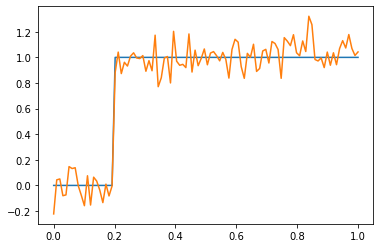

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# grid \Omega = [0,1]
n = 100
h = 1/(n-1)
x = np.linspace(0,1,n) 

# parameters
sigma = 1e-1

# make data
u = np.heaviside(x - 0.2,0)
f_delta = u + sigma*np.random.randn(n)

# plot
plt.plot(x,u,x,f_delta)
plt.show()

### Steepest descent

Consider the following fixed point iteration for minimizing a given function $f : \mathbb{R}^n \rightarrow \mathbb{R}$

$$
u^{(k+1)} = u^{(k)} - \alpha \nabla f(u^{(k)}),
$$

where $f$ is twice continuously differentiable and strictly convex:

$$
\mu I \preceq \nabla^2 f(u) \preceq L I,
$$

with $0 < \mu < L < \infty$.

* Show that the fixed point iteration converges linearly for $0 < \alpha < 2/L$.

```{admonition} Answer
:class: tip, dropdown

[Linear convergence](https://en.wikipedia.org/wiki/Rate_of_convergence#Basic_definition) implies that $\exists 0 < \rho < 1$ such that

$$\|u^{(k+1)} - u^*\| \leq \rho \|u^{(k)} - u*\|,$$

where $u^*$. To show this we start from the iteration and substract the fixed-point and use that $\nabla f(u^*) = 0$ to get

$$(u^{(k+1)} - u^*) = (u^{(k)} - u^*) - \alpha (\nabla f(u^{(k)}) - \nabla f (u^*)).$$

Next use Taylor to express

$$\nabla f(u^{(k)}) - \nabla f (u^*) = \nabla^2 f(\eta^{(k)}) (u^{(k)} - u^*),$$

with $\eta^{(k)} = t u^{(k)} + (1-t)u^*$ for some $t \in [0,1]$. We then get

$$\|u^{(k+1)} - u^*\|_2 \leq \|I - \alpha \nabla^2 f(\eta^{(k)})\|_2 \|u^{(k)} - u^*\|_2.$$

For linear convergence we need $\|I - \alpha \nabla^2 f(\eta^{(k)})\|_2 < 1$. We use that $\|A\|_2 = \sigma_{\max}(A)$. (cf. [Matrix norms](https://en.wikipedia.org/wiki/Matrix_norm#Special_cases))
Since the eigenvalues of $\nabla^2 f$ are bounded by $L$ we need $0 < \alpha < 2/L$ to ensure this.
```

* Determine the value of $\alpha$ for which the iteration converges fastest.

```{admonition} Answer
:class: tip, dropdown

The smaller the bound on the constant $\rho$, the faster the convergence. We have 

$$\|I - \alpha \nabla^2 f(\eta^{(k)})\|_2 = \ \max (|1 - \alpha \mu|, |1 - \alpha L|).$$

We obtain the smalles possible value by making both terms equal, for which we need

$$(1 - \alpha \mu) = -(1 - \alpha L),$$

this gives us an optimal value of $\alpha = 2/(\mu + L)$.
```

### Rosenbrock

We are going to test various optimization methods on the Rosenbrock function

$$
f(x,y) = (a - x)^2 + b(y - x^2)^2,
$$

with $a = 1$ and $b = 100$. The function has a global minimum at $(a, a^2)$.


* Write a function to compute the Rosenbrock function, its gradient and the Hessian for given input $(x,y)$. Visualize the function on $[-3,3]^2$ and indicate the neighborhood around the minimum where $f$ is convex.

* Implement the method from exercise 1 and test convergence from various initial points. Does the method always convergce? How small do you need to pick $\alpha$? How fast?

* Implement a linesearch strategy to ensure that $\alpha_k$ satisfies the Wolfe conditions, does $\alpha$ vary a lot?

```{admonition} Answer
:class: tip, dropdown

* In de code below, we show a graph of the function and determine the region of convexity by computing the eigenvalues of the Hessian (should be positive)

* We observe linear convergence for small enough $\alpha$

* Using a linesearch we obtain faster convergence by allowing larger steps in the beginning.
```

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

# rosenbrock function
def rosenbrock(x,a=1,b=100):
    x1 = x[0]
    x2 = x[1]
    f = (a - x1)**2 + b*(x2 - x1**2)**2
    g = np.array([-2*(a - x1) - 4*x1*b*(x2 - x1**2), 2*b*(x2 - x1**2)])
    H = np.array([[12*b*x1**2 -4*b*x2 + 2, -4*x1*b],[-4*b*x1, 2*b]])
    return f,g,H

# steepest descent
def steep(f,x0,alpha,niter):
    n = len(x0)
    x = np.zeros((niter,n))
    x[0] = x0
    for k in range(niter-1):
        fk,gk,_ = f(x[k])
        x[k+1] = x[k] - alpha*gk
    return x

# steepest descent with linesearch
def steep_wolfe(f,x0,alpha0,niter):
    n = len(x0)
    x = np.zeros((niter,n))
    x[0] = x0
    for k in range(niter-1):
        fk,gk,_ = f(x[k])
        pk = -alpha0*gk #reference stepsize
        alpha = line_search(lambda x : rosenbrock(x)[0], lambda x : rosenbrock(x)[1], x[k], pk)[0]
        if alpha: # check if linesearch was successfull
            x[k+1] = x[k] + alpha*pk
        else: # if not, use regular step
            x[k+1] = x[k] + pk
    return x

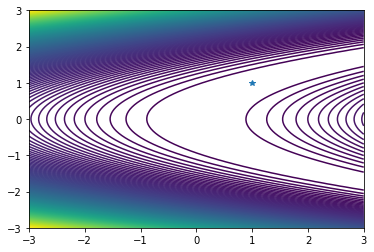

In [9]:
# plot of the Rosenbrock function
n = 100
x1 = np.linspace(-3,3,n)
x2 = np.linspace(-3,3,n)
xx1,xx2 = np.meshgrid(x1,x2)

xs = np.array([1,1])
fs = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        fs[i,j],_,_ = rosenbrock((x1[i],x2[j]))
        
plt.contour(xx1,xx2,fs,levels=200)
plt.plot(xs[0],xs[1],'*')

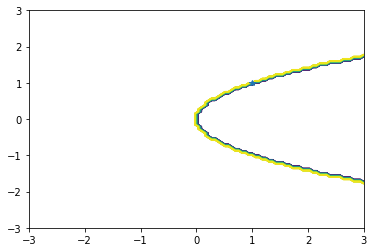

In [10]:
# determine region of convexity by computing eigenvalues of the Hessian
e1 = np.zeros((n,n))
e2 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        _,_,Hs = rosenbrock((x1[i],x2[j]))
        e1[i,j],e2[i,j] = np.linalg.eigvals(Hs)
        
plt.contour(xx1,xx2,(e1>0)*(e2>0),levels=50)
plt.plot(xs[0],xs[1],'*')

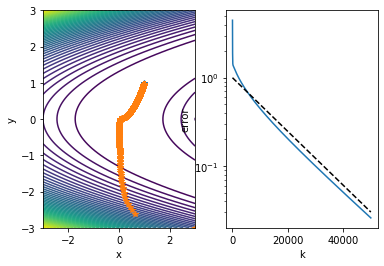

In [12]:
# run steepest descent
L = 12122
alpha = 1.99/L
maxiter = 50000

x = steep(rosenbrock, [3,-3],alpha,maxiter)

# plot
k = np.linspace(1,maxiter,maxiter)

fig,ax = plt.subplots(1,2)
ax[0].contour(xx1,xx2,fs,levels=50)
ax[0].plot(1,1,'*')
ax[0].plot(x[:,0],x[:,1],'*')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].semilogy(k,np.linalg.norm(x - xs,axis=1),k,(.99993)**k,'k--')
ax[1].set_xlabel('k')
ax[1].set_ylabel('error')

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


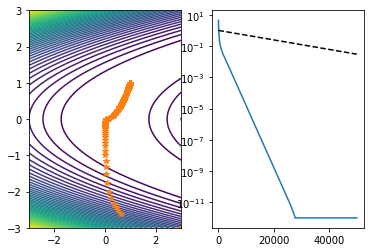

In [13]:
# run steepest descent with linesearch
L = 12122
alpha = 1.99/L
maxiter = 50000

x = steep_wolfe(rosenbrock, [3,-3],1.99/L,50000)

# plot
k = np.linspace(1,maxiter,maxiter)

fig,ax = plt.subplots(1,2)
ax[0].contour(xx1,xx2,fs,levels=50)
ax[0].plot(1,1,'*')
ax[0].plot(x[:,0],x[:,1],'*')
ax[1].semilogy(k,np.linalg.norm(x - xs,axis=1),k,(.99993)**k,'k--')

### Soft tresholding

In efficient splitting methods, e.g. in Split Bregman, see next exercise below, subproblems often can be reduced to proximal steps, like soft shrinkage.

* Hence, show in 1D $(\Omega \subset \mathbb{R})$, that a solution $z^* : \Omega \rightarrow \mathbb{R}$ of the functional

$$
	\min_z \frac{1}{2}\left\| z-f \right\|_{L^2(\Omega)}^2 + \alpha \left\| z \right\|_{L^1(\Omega)}
$$

is explicitly given by the application of the soft shrinkage operator $S_\alpha(f)$

$$ z^* = S_\alpha(f) := \left\{
\begin{align*}
&f - \alpha , &\text{if}\: f > \alpha \\
&0,           &\text{if}\: -\alpha \leq f \leq \alpha\\
&f + \alpha , &\text{if}\: f < -\alpha
\end{align*}
\right\}
$$

* What would happen with this formula if we would go from convex regularization to nonconvex regularization, i.e. $L^p(\Omega)$ with $0 < p < 1$ instead of $L^1(\Omega)$ in the regularization? (This is a difficult question. Search for hard shrinkage to get an idea.)

### A Prima-dual method for TV denoising

In the lecture we have introduced with Split-Bregman, or equivalently Alternating direction method of multipliers (ADMM), a splitting method, with which we can solve the ROF model 

$$ \min_u \frac{1}{2} \left\| u-f \right\|_{L^2(\Omega)} + \alpha \left\| \nabla u \right\|_{L^1(\Omega)}$$

efficiently in an alternating primal-dual fashion.

* Derive the splitting method in 1D $(\Omega \subset \mathbb{R})$ analogous to the lecture for the ROF model, implement it in Python and test it for different step sizes and regularisation parameters for a step function with additive Gaussian noise.

* How do the subproblems of the splitting algorithm change, if we make the transition from denoising to reconstruction with an operator $K:\Omega \rightarrow \Omega$, without introducing additional constraints? Which property would the operator $K$ need, such that the whole method could still be realised efficiently via FFT and DCT inside?

### Splitting methods

The aim is to solve the following variational problem

$$\min_u \frac{1}{2} \|Ku - f^{\delta}\|_2^2 + \alpha \|Lu\|_1,$$

where $K$ is a given forward operator (matrix) and $L$ is a discretisation of the second derivative operator.

1. Describe and implement a splitting method; you can be creative here -- multiple answers are possible
2. Compare your method with the basic subgradient-descent method implemented below
3. (bonus) Find a suitable value for $\alpha$ using the discrepancy principle

Some code to get you started is shown below.

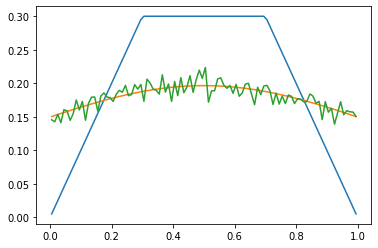

In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# forward operator
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)
    
    return K,x

# define regularization operator
def getL(n):
    h = 1/n;
    L = (np.diag(np.ones(n-1),-1) - 2*np.diag(np.ones(n),0) + np.diag(np.ones(n-1),1))/h**2
    return L

# define grid and operators
n = 100
delta = 1e-2
K,x = getK(n)
L = getL(n)

# true solution and corresponding data
u = np.minimum(0.5 - np.abs(0.5-x),0.3 + 0*x)
f = K@u

# noisy data
noise = np.random.randn(n)
f_delta = f + delta*noise

# plot
plt.plot(x,u,x,f,x,f_delta)
plt.show()

Text(0, 0.5, 'u(x)')

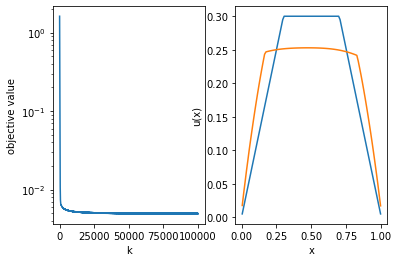

In [16]:
# example implementation of subgradient-descent
def subgradient(K, f_delta, alpha, L, t, niter):
    n = K.shape[1]
    u = np.zeros(n)
    objective = np.zeros(niter)
    for k in range(niter):
        # keep track of function value
        objective[k] = 0.5*np.linalg.norm(K@u - f_delta,2)**2 + alpha*np.linalg.norm(L@u,1)
        # compute (sub) gradient
        gr = (K.T@(K@u - f_delta) + alpha*L.T@np.sign(L@u))
        # update with stepsize t
        u = u - t*gr
    return u, objective

# get data
n = 100
delta = 1e-2

K,x = getK(n)
L = getL(n)

u = np.minimum(0.5 - np.abs(0.5-x),0.3 + 0*x)
f_delta = K@u + delta*noise

# parameters
alpha = 1e-6
niter = 100000
t = 1e-2

# run subgradient descent
uhat, objective = subgradient(K, f_delta, alpha, L, t, niter)

# plot
fig,ax = plt.subplots(1,2)

ax[0].semilogy(objective)
ax[0].set_xlabel('k')
ax[0].set_ylabel('objective value')

ax[1].plot(x,u,label='ground truth')
ax[1].plot(x,uhat,label='reconstruction')
ax[1].set_xlabel('x')
ax[1].set_ylabel('u(x)')